<a href="https://colab.research.google.com/github/Lhcenzetta/Classification-d-Images-avec-un-R-seau-Neuronal/blob/main/Bienvenue_dans_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load data

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Activation
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Affiche Categories

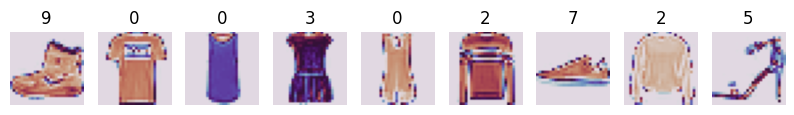

In [5]:
plt.figure(figsize=(10, 2))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(x_train[i], cmap='twilight')
    plt.title(y_train[i])
    plt.axis('off')

In [6]:
list_items = [ "T-shirt", "Trouser", "Pullover", "kswaa", "jakita",
    "Sandala", "chort", "sbatm9m9m", "sack", "boot"]

Rename Categories

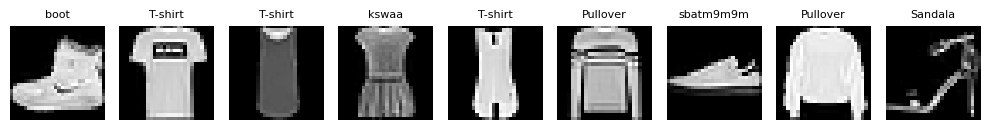

In [7]:
plt.figure(figsize=(10, 2))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(list_items[y_train[i]], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

Normalisations

In [8]:
x_train = x_train / 255
x_test = x_test / 255

Modelisation

In [9]:
import keras
from keras import layers
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(400, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train , epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7885 - loss: 0.6037 - val_accuracy: 0.8594 - val_loss: 0.4002
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8632 - loss: 0.3783 - val_accuracy: 0.8661 - val_loss: 0.3629
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8761 - loss: 0.3323 - val_accuracy: 0.8736 - val_loss: 0.3490
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8882 - loss: 0.3040 - val_accuracy: 0.8804 - val_loss: 0.3288
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8941 - loss: 0.2841 - val_accuracy: 0.8859 - val_loss: 0.3248
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9033 - loss: 0.2604 - val_accuracy: 0.8807 - val_loss: 0.3360
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9037 - loss: 0.2615 - val_accuracy: 0.8826 - val_loss: 0.3251
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9073 - los

Evalution

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8803 - loss: 0.3446
Test accuracy: 0.8805000185966492


callbacks

In [13]:
callback =keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=0,
    restore_best_weights=False
)

In [16]:
import numpy as np
history = model.fit(x_train, y_train, epochs=10, validation_split=(0.2), callbacks=[callback])


Evalution finale

In [15]:
test_loss_f, test_acc_f  = model.evaluate(x_test, y_test)
print(f'Test accuracy Finale: {test_acc_f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8803 - loss: 0.3619
Test accuracy Finale: 0.881600022315979


**sparse_categorical_crossentropy vs categorical_crossentropy**


# Nouvelle section